In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.isnull().sum() #boş değer var mı

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())

In [6]:
df.isnull().sum()

CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df = df.fillna(df.mean()) #Bütün boş alanları o alanın ortalaması ile doldurur
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.to_csv("HousingData_Clean.csv")

In [28]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.2 MB 3.4 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.2 MB 4.1 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.2 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.2 MB 4.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.2 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.2 MB 4.6 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.2 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------

In [29]:
# Etiket ile diğer verileri ayır

In [35]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [53]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
# Etiket ile diğer verileri ayır

In [47]:
X.shape

(506, 13)

In [48]:
# Train-Test-Split
# 306 eğitim
# 200 test
# 306 tanesinin inceler inceleme sonucu ne kadar başarılı olduğunu 200 üzerinde test eder

from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Random Seed-State -> Rastgeleliğin sabit kalmasını sağlar

In [50]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [51]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
y_pred = model.predict(X_test) # Tahmini yaptırdık

In [59]:
# MAE -> Mean Absolute Error

mae = mean_absolute_error(y_test, y_pred)
mae

3.141052567108417

In [61]:
# MSE => Mean Squared Error
# Daha büyük yanlışları daha fazla cezalandırır
mse = mean_squared_error(y_test, y_pred)
mse

21.818457953525755

In [63]:
# gerçek değer 10 ->
# tahmin 5 -> yanlışlık payı 5 birim    -> 25 birim
# tahmin 25 -> yanlışlık payı 15 birim  -> 225 birim
# 10 birim fark

In [65]:
import matplotlib.pyplot as plot

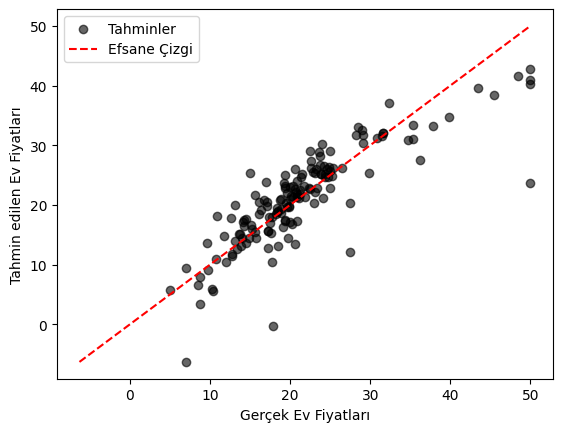

In [72]:
plot.scatter(y_test, y_pred, label="Tahminler", color="black" ,alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları")
plot.ylabel("Tahmin edilen Ev Fiyatları")

min_val = min(y_test.min(),y_pred.min())
max_val = max(y_test.max(),y_pred.max())

plot.plot([min_val,max_val], [min_val,max_val], color="red", linestyle="--", label="Efsane Çizgi")
plot.legend()
plot.show()

In [74]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])
coef_df

# CRIM (-0.12) - olması demek -> CRIM arttıkça Fiyat Azalır (Ters orantı)
# RAD (0.19) + olması demek -> RAD arttıkça fiyat artar (Doğru orantı)

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [75]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [110]:
import numpy as np
new_house = np.array(
    [
        [ 0.50,	0.0, 11.083992,	0.0, 1.51, 6.416, 68.518519, 2.6463, 15, 296, 16.6, 395.5, 9.04 ]
    ]
)

new_house

array([[  0.5     ,   0.      ,  11.083992,   0.      ,   1.51    ,
          6.416   ,  68.518519,   2.6463  ,  15.      , 296.      ,
         16.6     , 395.5     ,   9.04    ]])

In [111]:
feature_names = [ "CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT" ]
new_house_df = pd.DataFrame(new_house, columns=feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.5,0.0,11.083992,0.0,1.51,6.416,68.518519,2.6463,15.0,296.0,16.6,395.5,9.04


In [113]:
model.predict(new_house_df)

array([16.89937146])